# This cell is needed

In [1]:
# Loading the stuff you need
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

# Path to save the figure - change as needed 
path = '/Users/emma/Desktop'

# Some pretty colors to be used for plotting
technicolor = ['#00b9f2', '#008fd5', '#034da2', '#662e91', '#942977',
                       '#bf245e', '#ec1b30', '#f36523', '#ffc20f', '#ffec01', '#cadb2a',
                       '#8ec63f', '#00a640', '#008a4c', 'darkcyan']
lightblue   = technicolor[0]
blue        = technicolor[1]
darkblue    = technicolor[2]
purple      = technicolor[3]
darkmagenta = technicolor[4]
magenta     = technicolor[5]
red         = technicolor[6]
darkorange  = technicolor[7]
lightorange = technicolor[8]
yellow      = technicolor[9]
grass       = technicolor[10]
darkgrass   = technicolor[11]
green       = technicolor[12]
darkgreen   = technicolor[13]
darkcyan    = technicolor[14]

# This is just fior illustration, and may of course be omitted
fig = plt.figure(figsize=(10,6))
for i in range(len(technicolor)):
    plt.plot(i,1,marker='o',color=technicolor[i])

/Users/emma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


# This cell is not needed

In [2]:
# Creating some mock data and fit

r = np.random                         
r.seed(42) 

def func(x,a,b,c):
    return a*x**2 + b*x + c

a,b,c = 1,2,3
xdata = r.uniform(0,20,30)
ydata = func(xdata,a,b,c)
yerr  = r.normal(loc=30.0,scale=15.0,size=30)

xdata,ydata=zip(*sorted(zip(xdata,ydata)))
xdata,ydata=np.asarray(xdata),np.asarray(ydata)

# This cell is needed

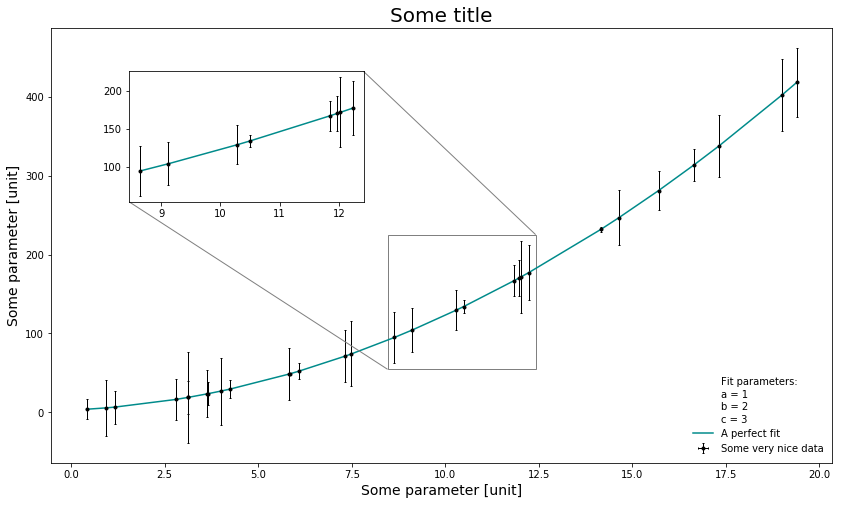

In [3]:
########################################################################
# The main figure
########################################################################

fig, ax1 = plt.subplots(figsize=(14,8))

# The data
ax1.errorbar(xdata, ydata, xerr=0.0, yerr=yerr, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1,label='Some very nice data')

# The fit
ax1.plot(xdata,ydata,marker='',linestyle='-',color=darkcyan,label='A perfect fit')

########################################################################
# The text, title, axes and legend
########################################################################

# Some axes and title
ax1.set_xlabel('Some parameter [unit]', fontsize=14)
ax1.set_ylabel('Some parameter [unit]', fontsize=14)
ax1.set_title('Some title', fontsize=20)

# Legend and information from text insert
ax1.legend(loc='lower right',frameon=False)

# Manually set the location of the informative text
xs = 0.857
ys = 0.18
s  = ['Fit parameters:',f'a = {a}', f'b = {b}', f'c = {c}']

# Plotting it this way instead of the Troels way gives better resolution of text and more control of fontsize etc
for i in range(len(s)):
    ax1.text(xs, ys-i/34, s[i], horizontalalignment='left',verticalalignment='baseline', transform=ax1.transAxes)

########################################################################
# The insert figure
########################################################################

# Create a set of inset Axes: these should fill the bounding box allocated to them
ax2 = plt.axes([0.1,0.1,1,1])

# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.1,0.6,0.3,0.3])
ax2.set_axes_locator(ip)

# Mark the region corresponding to the inset axes on ax1 and draw lines in grey linking the two axes
mark_inset(ax1, ax2, loc1=3, loc2=1, fc="none", ec='0.5')

# The data for masked region
mask = np.where((xdata>7.5)&(xdata<14))[0]
ax2.errorbar(xdata[mask], ydata[mask], xerr=0.0, yerr=yerr[mask], fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1,label='Some very nice data')

# The fit for masked region
ax2.plot(xdata[mask],ydata[mask],marker='',linestyle='-',color=darkcyan,label='A perfect fit')

# Save the figure
fig.savefig('{0}/{1}.pdf'.format(path,'name_of_figure'))